# Data Space Report


<img src="images/polito_logo.png" alt="Polito Logo" style="width: 200px;"/>


## Pittsburgh Bridges Data Set

<img src="images/andy_warhol_bridge.jpg" alt="Andy Warhol Bridge" style="width: 200px;"/>

    Andy Warhol Bridge - Pittsburgh.

Report created by Student Francesco Maria Chiarlo s253666, for A.A 2019/2020.

**Abstract**:The aim of this report is to evaluate the effectiveness of distinct, different statistical learning approaches, in particular focusing on their characteristics as well as on their advantages and backwards when applied onto a relatively small dataset as the one employed within this report, that is Pittsburgh Bridgesdataset.

**Key words**:Statistical Learning, Machine Learning, Bridge Design.

## TOC:
* [Imports Section](#imports-section)
* [Dataset's Attributes Description](#attributes-description)
* [Data Preparation and Investigation](#data-preparation)
* [Learning Models](#learning-models)
* [Improvements and Conclusions](#improvements-and-conclusions)
* [References](#references)

### Imports Section <a class="anchor" id="imports-section"></a>

In [1]:
# =========================================================================== #
# STANDARD IMPORTS
# =========================================================================== #
print(__doc__)

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

import copy
import os
import sys
import time
import itertools

import pandas as pd
import numpy as np

%matplotlib inline
# Matplotlib pyplot provides plotting API
import matplotlib as mpl
from matplotlib import pyplot as plt
import chart_studio.plotly.plotly as py
import seaborn as sns;  sns.set(style="ticks", color_codes=True) # sns.set()

Automatically created module for IPython interactive environment


In [2]:
# =========================================================================== #
# UTILS IMPORTS (Done by myself)
# =========================================================================== #
from utils.display_utils import display_heatmap
from utils.display_utils import show_frequency_distribution_predictors
from utils.display_utils import show_frequency_distribution_predictor
from utils.display_utils import build_boxplot
from utils.display_utils import show_categorical_predictor_values
from utils.display_utils import  show_cum_variance_vs_components
from utils.display_utils import show_histograms_from_heatmap_corr_matrix
from utils.display_utils import show_pca_1_vs_pca_2_pcaKernel
from utils.display_utils import show_scatter_plots_pcaKernel
from utils.display_utils import show_overall_dataset_scatter_plots
from utils.display_utils import show_learning_curve

from utils.preprocessing_utils import preprocess_categorical_variables
from utils.preprocessing_utils import  preprocessing_data_rescaling

from utils.training_utils import sgd_classifier_grid_search
from utils.training_utils import naive_bayes_classifier_grid_search
from utils.training_utils import svm_linear_classifier_grid_search
from utils.training_utils import decision_tree_classifier_grid_search
from utils.training_utils import random_forest_classifier_grid_search
from utils.training_utils import plot_roc_crossval

from utils.training_utils_v2 import fit_by_n_components, fit_all_by_n_components

In [3]:
from itertools import islice

In [4]:
# =========================================================================== #
# sklearn IMPORT
# =========================================================================== #
from sklearn.decomposition import PCA, KernelPCA

# Import scikit-learn classes: models (Estimators).
from sklearn.naive_bayes import GaussianNB           # Non-parametric Generative Model
from sklearn.naive_bayes import MultinomialNB        # Non-parametric Generative Model
from sklearn.linear_model import LinearRegression    # Parametric Linear Discriminative Model
from sklearn.linear_model import LogisticRegression  # Parametric Linear Discriminative Model
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC                          # Parametric Linear Discriminative "Support Vector Classifier"
from sklearn.tree import DecisionTreeClassifier      # Non-parametric Model
from sklearn.ensemble import BaggingClassifier       # Non-parametric Model (Meta-Estimator, that is, an Ensemble Method)
from sklearn.ensemble import RandomForestClassifier  # Non-parametric Model (Meta-Estimator, that is, an Ensemble Method)

### Dataset's Attributes Description <a class="anchor" id="attributes-description"></a>

The analyses that I aim at accomplishing while using as means the methods or approaches provided by both Statistical Learning and Machine Learning fields, concern the dataset Pittsburgh Bridges, and what follows is a overview and brief description of the main characteristics, as well as, basic information about this precise dataset.

The Pittsburgh Bridges dataset is a dataset available from the web site called mainly *"UCI Machine Learing Repository"*, which is one of the well known web site that let a large amount of different datasets, from different domains or fields, to be used for machine-learning research and which have been cited in peer-reviewed academic journals.

In particular, the dataset I'm going to treat and analyze, which is Pittsburgh Bridges dataset, has been made freely available from the Western Pennsylvania Regional Data Center (WPRDC), which is a project led by the University Center of Social and Urban Research (UCSUR) at the University of Pittsburgh ("University") in collaboration with City of Pittsburgh and The County of Allegheny in Pennsylvania. The WPRDC and the WPRDC Project is supported by a grant from the Richard King Mellon Foundation.

In order to be more precise, from the official and dedicated web page, within UCI Machine Learning cite, Pittsburgh Bridges dataset is a dataset that has been created after the works of some co-authors which are:
- Yoram Reich & Steven J. Fenves from Department of Civil Engineering and Engineering Design Research Center Carnegie Mellon University Pittsburgh, PA 15213

The Pittsburgh Bridges dataset is made of up to 108 distinct observations and each of that data sample is made of 12 attributes or features where some of them are considered to be continuous properties and other to be categorical or nominal properties. Those variables are the following:

- **RIVER**: which is a nominal type variable that can assume the subsequent possible discrete values which are: A, M, O. Where A stands for Allegheny river, while M stands for Monongahela river and lastly O stands for Ohio river.
- **LOCATION**: which represents a nominal type variable too, and assume a positive integer value from 1 up to 52 used as categorical attribute.
- **ERECTED**: which might be either a numerical or categorical variable, depending on the fact that we want to aggregate a bunch of value under a categorical quantity. What this means is that, basically such attribute is made of date starting from 1818 up to 1986, but we may imagine to aggregate somehow these data within a given category among those suggested, that are CRAFTS, EMERGENING, MATURE, MODERN.
- **PURPOSE**: which is a categorical attribute and represents the reason why a particular bridge has been built, which means that this attribute represents what kind of vehicle can cross the bridge or if the bridge has been made just for people. For this reasons the allowd values for this attributes are the following: WALK, AQUEDUCT, RR, HIGHWAY. Three out of four are self explained values, while RR value that might be tricky at first glance, it just stands for railroad.
- **LENGTH**: which represents the bridge's length, is a numerical attribute if we just look at the real number values that go from 804 up to 4558, but we can again decide to handle or arrange such values so that they can be grouped into range of values mapped into SHORT, MEDIUM, LONG so that we can refer to a bridge's length by means of these new categorical values.
- **LANES**: which is a categorical variable which is represented by numerical values, that are 1, 2, 4, 6 which indicate the number of distinct lanes that a bridge in Pittsburgh city may have. The larger the value the wider the bridge.
- **CLEAR-G**: specifies  whether  a  vertical  navigation clearance requirement was enforced in the design or not.
- **T-OR-D**: which is a nominal attribute, in other words, a categorical attribute that can assume THROUGH, DECK values. In order to be more precise, this samples attribute deals with structural elements of a bridge. In fact, a deck is the surface of a bridge and this structural element, of bridge's superstructure, may be constructed of concrete, steel, open grating, or wood. On the other hand, a through arch bridge, also known as a half-through arch bridge or a through-type arch bridge, is a bridge that is made from materials such as steel or reinforced concrete, in which the base of an arch structure is below the deck but the top rises above it.
- **MATERIAL**: which is a categorical or nominal variable and is used to describe the bridge telling which is the main or core material used to build it.
  This attribute can assume one of the possible, following values which are: WOOD, IRON, STEEL. Furthermore, we expect to see somehow a bit of correlation between the values assumed by the pairs represented by T-OR-D and MATERIAL columns, when looking just to them.
- **SPAN**: which is a categorical or nominal value and has been recorded by means of three possible values for each sample, that are SHORT, MEDIUM, LONG. This attribute, within the field of Structural Engineering, is the distance between two intermediate supports for a structure, e.g. a beam or a bridge. A span can be closed by a solid beam or by a rope. The first kind is used for bridges, the second one for power lines, overhead telecommunication lines, some type of antennas or for aerial tramways. 
- **REL-L**: which is a categorical or nominal variable and stands for relative length of the main span of the bridge to the total crossing length, it can assume three possible values that are S, S-F, F.
- Lastly, **TYPE** which indicates as a categorical or nominal attributes what type of bridge each record represents, among the possible 6 distinct classes or types of bridges that are: WOOD, SUSPEN, SIMPLE-T, ARCH, CANTILEV, CONT-T.

### Data Preparation and Investigation <a class="anchor" id="data-preparation"></a>

The aim of this chapter is to get in the data, that are available within Pittsburgh Bridge Dataset, in order to investigate a bit more in to detail and generally speaking deeper the main or high level statistics quantities, such as mean, median, standard deviation of each attribute, as well as displaying somehow data distribution for each attribute by means of histogram plots. This phase allows or enables us to decide which should be the best feature to be selected as the target variable, in other word the attribute that will represent the dependent variable with respect to the remaining attributes that instead will play the role of predictors and independent variables, as well.

In order to investigate and explore our data we make usage of *Pandas library*. We recall mainly that, in computer programming, Pandas is a software library written for the Python programming language* for *data manipulation and analysis*. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software and a interesting and funny things about such tool is that the name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals.
We also note that as the analysis proceeds we will introduce other computer programming as well as programming libraries that allow or enable us to fulfill our goals.

Initially, once I have downloaded from the provided web page the dataset with the data samples about Pittsburgh Bridge we load the data by means of functions available using python library's pandas. We notice that the overall set of data points is large up to 108 records or rows, which are sorted by Erected attributes, so this means that are sorted in decreasing order from the oldest bridge which has been built in 1818 up to the most modern bridge that has been erected in 1986. Then we display the first 5 rows to get an overview and have a first idea about what is inside the overall dataset, and the result we obtain by means of head() function applied onto the fetched dataset is equals to what follows:

In [5]:
# =========================================================================== #
# READ INPUT DATASET
# =========================================================================== #

dataset_path = 'C:\\Users\\Francesco\Documents\\datasets\\pittsburgh_dataset'
dataset_name = 'bridges.data.csv'

TARGET_COL = 'T-OR-D'  

# column_names = ['IDENTIF', 'RIVER', 'LOCATION', 'ERECTED', 'PURPOSE', 'LENGTH', 'LANES', 'CLEAR-G', 'T-OR-D', 'MATERIAL', 'SPAN', 'REL-L', 'TYPE']
column_names = ['RIVER', 'LOCATION', 'ERECTED', 'PURPOSE', 'LENGTH', 'LANES', 'CLEAR-G', 'T-OR-D', 'MATERIAL', 'SPAN', 'REL-L', 'TYPE']
dataset = pd.read_csv(os.path.join(dataset_path, dataset_name), names=column_names, index_col=0)

In [6]:
# SHOW SOME STANDARD DATASET INFOS
# --------------------------------------------------------------------------- #
print('Dataset shape: {}'.format(dataset.shape))
print(dataset.info())

Dataset shape: (108, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, E1 to E109
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RIVER     108 non-null    object
 1   LOCATION  108 non-null    object
 2   ERECTED   108 non-null    int64 
 3   PURPOSE   108 non-null    object
 4   LENGTH    108 non-null    object
 5   LANES     108 non-null    object
 6   CLEAR-G   108 non-null    object
 7   T-OR-D    108 non-null    object
 8   MATERIAL  108 non-null    object
 9   SPAN      108 non-null    object
 10  REL-L     108 non-null    object
 11  TYPE      108 non-null    object
dtypes: int64(1), object(11)
memory usage: 11.0+ KB
None


In [7]:
# SHOWING FIRSTS N-ROWS AS THEY ARE STORED WITHIN DATASET
# --------------------------------------------------------------------------- #
dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD


What we can notice from just the table above is that there are some attributes that are characterized by a special character that is '?' which stands for a missing value, so by chance there was not possibility to get the value for this attribute, such as for LENGTH and SPAN attributes. Analyzing in more details the dataset we discover that there are up to 6 different attributes, in the majority attributes with categorical or nominal nature such as CLEAR-G, T-OR-D, MATERIAL, SPAN, REL-L, and TYPE that contain at list one row characterized by the fact that one of its attributes is set to assuming '?' value that stands, as we already know for a missing value.

Here, we can follow different strategies that depends onto the level of complexity as well as accuracy we want to obtain or achieve for models we are going to fit to the data after having correctly pre-processed them, speaking about what we could do with missing values. In fact one can follow the simplest way and can decide to simply discard those rows that contain at least one attribute with a missing value represented by the '?' symbol. Otherwise one may alos decide to follow a different strategy that aims at keeping also those rows that have some missing values by means of some kind of technique that allows to establish a potential substituting value for the missing one.

So, in this setting, that is our analyses, we start by just leaving out those rows that at least contain one attribute that has a missing value, this choice leads us to reduce the size of our dataset from 108 records to 70 remaining samples, with a drop of 38 data examples, which may affect the final results, since we left out more or less the 46\% of the data because of missing values.

In [8]:
# INVESTIGATING DATASET IN ORDER TO DETECT NULL VALUES
# --------------------------------------------------------------------------- #
print('Before preprocessing dataset and handling null values')
result = dataset.isnull().values.any()
print('There are any null values ? Response: {}'.format(result))

result = dataset.isnull().sum()
print('Number of null values for each predictor:\n{}'.format(result))

Before preprocessing dataset and handling null values
There are any null values ? Response: False
Number of null values for each predictor:
RIVER       0
LOCATION    0
ERECTED     0
PURPOSE     0
LENGTH      0
LANES       0
CLEAR-G     0
T-OR-D      0
MATERIAL    0
SPAN        0
REL-L       0
TYPE        0
dtype: int64


In [9]:
# DISCOVERING VALUES WITHIN EACH PREDICTOR DOMAIN
# --------------------------------------------------------------------------- #
columns_2_avoid = ['ERECTED', 'LENGTH', 'LOCATION', 'LANES']
# columns_2_avoid = None
list_columns_2_fix = show_categorical_predictor_values(dataset, columns_2_avoid)

RIVER    : ['A', 'M', 'O', 'Y']
PURPOSE  : ['AQUEDUCT', 'HIGHWAY', 'RR', 'WALK']
CLEAR-G  : ['?', 'G', 'N']
T-OR-D   : ['?', 'DECK', 'THROUGH']
MATERIAL : ['?', 'IRON', 'STEEL', 'WOOD']
SPAN     : ['?', 'LONG', 'MEDIUM', 'SHORT']
REL-L    : ['?', 'F', 'S', 'S-F']
TYPE     : ['?', 'ARCH', 'CANTILEV', 'CONT-T', 'NIL', 'SIMPLE-T', 'SUSPEN', 'WOOD']


In [10]:
# FIXING, UPDATING NULL VALUES CODED AS '?' SYMBOL
# WITHIN EACH CATEGORICAL VARIABLE, IF DETECTED ANY
# --------------------------------------------------------------------------- #
print('"Before" removing \'?\' rows, Dataset dim:', dataset.shape)
for _, predictor in enumerate(list_columns_2_fix):
    dataset = dataset[dataset[predictor] != '?']
print('"After" removing \'?\' rows, Dataset dim: ', dataset.shape)
print('-' * 50)

_ = show_categorical_predictor_values(dataset, columns_2_avoid)

"Before" removing '?' rows, Dataset dim: (108, 12)
"After" removing '?' rows, Dataset dim:  (88, 12)
--------------------------------------------------
RIVER    : ['A', 'M', 'O', 'Y']
PURPOSE  : ['AQUEDUCT', 'HIGHWAY', 'RR']
CLEAR-G  : ['G', 'N']
T-OR-D   : ['DECK', 'THROUGH']
MATERIAL : ['IRON', 'STEEL', 'WOOD']
SPAN     : ['LONG', 'MEDIUM', 'SHORT']
REL-L    : ['F', 'S', 'S-F']
TYPE     : ['ARCH', 'CANTILEV', 'CONT-T', 'SIMPLE-T', 'SUSPEN', 'WOOD']


In [11]:
# INTERMEDIATE RESULT FOUND
# --------------------------------------------------------------------------- #
preprocess_categorical_variables(dataset, columns_2_avoid)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, E1 to E90
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RIVER     88 non-null     int64 
 1   LOCATION  88 non-null     object
 2   ERECTED   88 non-null     int64 
 3   PURPOSE   88 non-null     int64 
 4   LENGTH    88 non-null     object
 5   LANES     88 non-null     object
 6   CLEAR-G   88 non-null     int64 
 7   T-OR-D    88 non-null     int64 
 8   MATERIAL  88 non-null     int64 
 9   SPAN      88 non-null     int64 
 10  REL-L     88 non-null     int64 
 11  TYPE      88 non-null     int64 
dtypes: int64(9), object(3)
memory usage: 8.9+ KB
None


In [12]:
dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E1,2,3,1818,2,?,2,2,2,3,3,2,6
E2,1,25,1819,2,1037,2,2,2,3,3,2,6
E5,1,29,1837,2,1000,2,2,2,3,3,2,6
E7,1,27,1840,2,990,2,2,2,3,2,2,6
E8,1,28,1844,1,1000,1,2,2,1,3,2,5


The next step is represented by the effort of mapping categorical variables into numerical variables, so that them are comparable with the already existing numerical or continuous variables, and also by mapping the categorical variables into numerical variables we allow or enable us to perform some kind of normalization or just transformation onto the entire dataset in order to let some machine learning algorithm to work better or to take advantage of normalized data within our pre-processed dataset. Furthermore, by transforming first the categorical attributes into a continuous version we are also able to calculate the \textit{heatmap}, which is a very useful way of representing a correlation matrix calculated on the whole dataset. Moreover we have displayed data distribution for each attribute by means of histogram representation to take some useful information about the number of occurrences for each possible value, in particular for those attributes that have a categorical nature.

In [13]:
# MAP NUMERICAL VALUES TO INTEGER VALUES
# --------------------------------------------------------------------------- #
print('Before', dataset.shape)
columns_2_map = ['ERECTED', 'LANES']
for _, predictor in enumerate(columns_2_map):
    dataset = dataset[dataset[predictor] != '?']
    dataset[predictor] = np.array(list(map(lambda x: int(x), dataset[predictor].values)))
print('After', dataset.shape)
print(dataset.info())
# print(dataset.head(5))

Before (88, 12)
After (80, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, E1 to E90
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RIVER     80 non-null     int64 
 1   LOCATION  80 non-null     object
 2   ERECTED   80 non-null     int32 
 3   PURPOSE   80 non-null     int64 
 4   LENGTH    80 non-null     object
 5   LANES     80 non-null     int32 
 6   CLEAR-G   80 non-null     int64 
 7   T-OR-D    80 non-null     int64 
 8   MATERIAL  80 non-null     int64 
 9   SPAN      80 non-null     int64 
 10  REL-L     80 non-null     int64 
 11  TYPE      80 non-null     int64 
dtypes: int32(2), int64(8), object(2)
memory usage: 7.5+ KB
None


In [14]:
# MAP NUMERICAL VALUES TO FLOAT VALUES
# --------------------------------------------------------------------------- #
# print('Before', dataset.shape)
columns_2_map = ['LOCATION', 'LANES', 'LENGTH']    
for _, predictor in enumerate(columns_2_map):
    dataset = dataset[dataset[predictor] != '?']
    dataset[predictor] = np.array(list(map(lambda x: float(x), dataset[predictor].values)))
# print('After', dataset.shape)    
# print(dataset.info()); # print(dataset.head(5))

# columns_2_avoid = None
# list_columns_2_fix = show_categorical_predictor_values(dataset, None)

In [15]:
result = dataset.isnull().values.any()
# print('After handling null values\nThere are any null values ? Response: {}'.format(result))

result = dataset.isnull().sum()
# print('Number of null values for each predictor:\n{}'.format(result))

dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E2,1,25.0,1819,2,1037.0,2.0,2,2,3,3,2,6
E5,1,29.0,1837,2,1000.0,2.0,2,2,3,3,2,6
E7,1,27.0,1840,2,990.0,2.0,2,2,3,2,2,6
E8,1,28.0,1844,1,1000.0,1.0,2,2,1,3,2,5
E9,2,3.0,1846,2,1500.0,2.0,2,2,1,3,2,5


In [16]:
dataset.describe(include='all')

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,1.642857,25.438571,1911.542857,2.214286,1597.657143,2.857143,1.257143,1.814286,2.071429,1.742857,1.728571,3.457143
std,0.723031,13.223347,36.010339,0.478308,780.237680,1.242785,0.440215,0.391684,0.428054,0.629831,0.797122,1.575958
min,1.000000,1.000000,1819.000000,1.000000,840.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,15.250000,1891.250000,2.000000,1000.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.500000,27.000000,1915.000000,2.000000,1325.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000
75%,2.000000,35.750000,1935.500000,2.000000,2000.000000,4.000000,1.750000,2.000000,2.000000,2.000000,2.000000,4.000000
max,3.000000,49.000000,1978.000000,3.000000,4558.000000,6.000000,2.000000,2.000000,3.000000,3.000000,3.000000,6.000000


In [17]:
# target_col=TARGET_COL diag_kind="kde" kind="reg"
# show_overall_dataset_scatter_plots(dataset, target_col=TARGET_COL, diag_kind=None, kind="reg", corner=None, gmap_levels=None)

In [18]:
columns_2_avoid = ['ERECTED', 'LENGTH', 'LOCATION']
target_col = 'T-OR-D'

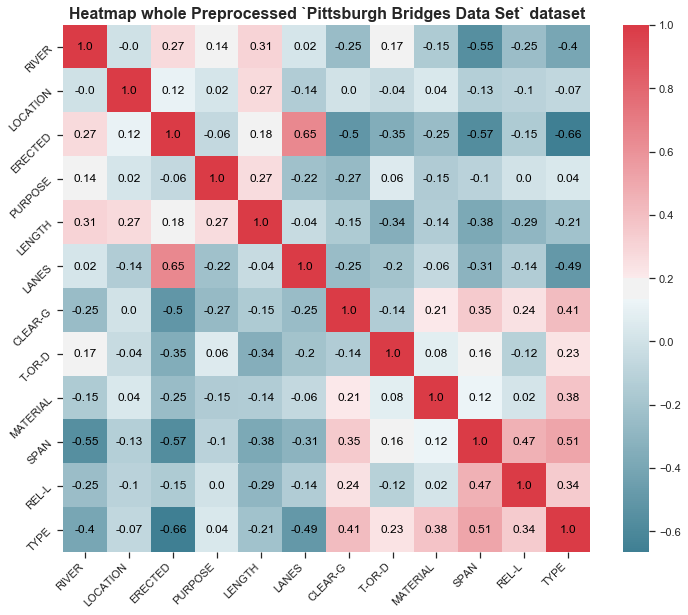

In [19]:
corr_result = dataset.corr()
# corr_result.head(corr_result.shape[0])
display_heatmap(corr_result)

In [20]:
# show_histograms_from_heatmap_corr_matrix(corr_result, row_names=dataset.columns)

In [21]:
# Make distinction between Target Variable and Predictors
# --------------------------------------------------------------------------- #

columns = dataset.columns  # List of all attribute names
target_col = 'T-OR-D'      # Target variable name

# Get Target values and map to 0s and 1s
y = np.array(list(map(lambda x: 0 if x == 1 else 1, dataset[target_col].values)))
print('Summary about Target Variable {target_col}')
print('-' * 50)
print(dataset['T-OR-D'].value_counts())

# Get Predictors
X = dataset.loc[:, dataset.columns != target_col]

Summary about Target Variable {target_col}
--------------------------------------------------
2    57
1    13
Name: T-OR-D, dtype: int64


In [22]:
# Standardizing the features
# --------------------------------------------------------------------------- #
scaler_methods = ['minmax', 'standard', 'norm']
scaler_method = 'standard'
rescaledX = preprocessing_data_rescaling(scaler_method, X)

shape features matrix X, after normalizing:  (70, 11)


## Pricipal Component Analysis

In [23]:
n_components = rescaledX.shape[1]
pca = PCA(n_components=n_components)
# pca = PCA(n_components=2)

# X_pca = pca.fit_transform(X)
pca = pca.fit(rescaledX)
X_pca = pca.transform(rescaledX)

In [24]:
print(f"Cumulative varation explained(percentage) up to given number of pcs:")

tmp_data = []
principal_components = [pc for pc in '2,5,6,7,8,9,10'.split(',')]
for _, pc in enumerate(principal_components):
    n_components = int(pc)
    
    cum_var_exp_up_to_n_pcs = np.cumsum(pca.explained_variance_ratio_)[n_components-1]
    # print(f"Cumulative varation explained up to {n_components} pcs = {cum_var_exp_up_to_n_pcs}")
    # print(f"# pcs {n_components}: {cum_var_exp_up_to_n_pcs*100:.2f}%")
    tmp_data.append([n_components, cum_var_exp_up_to_n_pcs * 100])

tmp_df = pd.DataFrame(data=tmp_data, columns=['# PCS', 'Cumulative Varation Explained (percentage)'])
tmp_df.head(len(tmp_data))

Cumulative varation explained(percentage) up to given number of pcs:


,# PCS,Cumulative Varation Explained (percentage)
0,2,47.738342
1,5,75.856460
2,6,82.615768
3,7,88.413903
4,8,92.661938
5,9,95.976841
6,10,98.432807


In [25]:
n_components = rescaledX.shape[1]
pca = PCA(n_components=n_components)
# pca = PCA(n_components=2)

#X_pca = pca.fit_transform(X)
pca = pca.fit(rescaledX)
X_pca = pca.transform(rescaledX)
    
fig = show_cum_variance_vs_components(pca, n_components)

# py.sign_in('franec94', 'QbLNKpC0EZB0kol0aL2Z')
# py.iplot(fig, filename='selecting-principal-components {}'.format(scaler_method))

#### Major Pros & Cons of PCA



## Learning Models <a class="anchor" id="learning-models"></a>

In [26]:
# Parameters to be tested for Cross-Validation Approach

estimators_list = [GaussianNB(), LogisticRegression(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
estimators_names = ['GaussianNB', 'LogisticRegression', 'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier']

pca_kernels_list = ['linear', 'poly', 'rbf', 'cosine',]
cv_list = [10, 9, 8, 7, 6, 5, 4, 3, 2]

parameters_sgd_classifier = {
    'clf__loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'),
    'clf__penalty': ('l2', 'l1', 'elasticnet'),
    'clf__alpha': (1e-1, 1e-2, 1e-3, 1e-4),
    'clf__max_iter': (50, 100, 150, 200, 500, 1000, 1500, 2000, 2500),
    'clf__learning_rate': ('optimal',),
    'clf__tol': (None, 1e-2, 1e-4, 1e-5, 1e-6)
}

kernel_type = 'svm-rbf-kernel'
parameters_svm = {
    'clf__gamma': (0.003, 0.03, 0.05, 0.5, 0.7, 1.0, 1.5),
    'clf__max_iter':(1e+2, 1e+3, 2 * 1e+3, 5 * 1e+3, 1e+4, 1.5 * 1e+3),
    'clf__C': (1e-4, 1e-3, 1e-2, 0.1, 1.0, 10, 1e+2, 1e+3),
}

parmas_decision_tree = {
    'clf__splitter': ('random', 'best'),
    'clf__criterion':('gini', 'entropy'),
    'clf__max_features': (None, 'auto', 'sqrt', 'log2')
}

parmas_random_forest = {
    'clf__n_estimators': (3, 5, 7, 10, 30, 50, 70, 100, 150, 200),
    'clf__criterion':('gini', 'entropy'),
    'clf__bootstrap': (True, False)
}

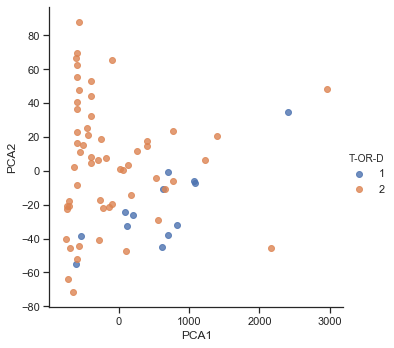

In [27]:
model = PCA(n_components=2)
model.fit(X)              
X_2D = model.transform(X)

df = pd.DataFrame()
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]
df[target_col] = dataset[target_col].values

sns.lmplot("PCA1", "PCA2", hue=target_col, data=df, fit_reg=False)

# show_pca_1_vs_pca_2_pcaKernel(X, pca_kernels_list, target_col, dataset)
# show_scatter_plots_pcaKernel(X, pca_kernels_list, target_col, dataset, n_components=12)

In [ ]:
plot_dest = os.path.join("figures", "n_comp_2")
N_CV, N_KERNEL = 9, 4
assert len(cv_list) >= N_CV, f"Error: N_CV={N_CV} > len(cv_list)={len(cv_list)}"
assert len(pca_kernels_list) >= N_KERNEL, f"Error: N_KERNEL={N_KERNEL} > len(pca_kernels_list)={len(pca_kernels_list)}"

n = len(estimators_list) # len(estimators_list)
dfs_list = fit_all_by_n_components(
    estimators_list=estimators_list[:n], \
    estimators_names=estimators_names[:n], \
    X=X, \
    y=y, \
    n_components=2, \
    show_plots=False, \
    cv_list=cv_list[:N_CV], \
    # pca_kernels_list=['linear'],
    pca_kernels_list=pca_kernels_list[:N_KERNEL],
    verbose=0
)

In [ ]:
# GaussianNB
# -----------------------------------
dfs_list[0].head(dfs_list[0].shape[0])

In [ ]:
plot_name = 'GaussianNB_learning_curve.png'
show_learning_curve(dfs_list[0], n=len(cv_list[:N_CV]), plot_dest=plot_dest, grid_size=[2, 2], plot_name=plot_name)

In [ ]:
# LogisticRegression
# -----------------------------------
dfs_list[1].head(dfs_list[1].shape[0])

In [ ]:
plot_name = 'LogisticRegression_learning_curve.png'
show_learning_curve(dfs_list[1], n=len(cv_list[:N_CV]), plot_dest=plot_dest, grid_size=[2,2], plot_name=plot_name)

In [ ]:
# SVC
# -----------------------------------
dfs_list[2].head(dfs_list[2].shape[0])

In [ ]:
plot_name = 'SVC_learning_curve.png'
show_learning_curve(dfs_list[2], n=len(cv_list[:N_CV]), plot_dest=plot_dest, grid_size=[2,2], plot_name=plot_name)

In [ ]:
# DecisionTreeClassifier
# -----------------------------------
dfs_list[3].head(dfs_list[3].shape[0])

In [ ]:
plot_name = 'DecisionTreeClassifier_learning_curve.png'
show_learning_curve(dfs_list[3], n=len(cv_list[:N_CV]), plot_dest=plot_dest, grid_size=[2,2], plot_name=plot_name)

In [ ]:
# RandomForestClassifier
# -----------------------------------
dfs_list[4].head(dfs_list[4].shape[0])

In [ ]:
plot_name = 'RandomForestClassifier_learning_curve.png'
show_learning_curve(dfs_list[4], n=len(cv_list[:N_CV]), plot_dest=plot_dest, grid_size=[2,2], plot_name=plot_name)

In [ ]:
def show_learning_curve(dataset, plot_name, grid_size, plot_dest="figures", n=None):
    col_names = dataset.columns.values.tolist()
    col_accs = col_names[0::2]
    col_stds = col_names[1::2]

    # print(col_names); print(col_accs); print(col_stds);

    plt.figure()
    plt.figure(figsize=(15, 15))
    estimator_name = plot_name.split("_")[0]
    plt.title(f"Learning Curve {estimator_name}")
    grid_shape = int(''.join([str(ii) for ii in grid_size]))
    for ii, (col_acc, col_std) in enumerate(zip(col_accs, col_stds)):

        # plt.subplot(int(f"{grid_shape}{ii+1}"))
        plt.subplot(grid_size[0], grid_size[1], ii+1)
        acc_list = dataset[col_acc].values[:n]
        std_list = dataset[col_std].values[:n]
        
        plt.plot(range(len(acc_list)), [float(xi) for xi in acc_list] , label='linear')

        for ii, (conf_interval, val) in enumerate(zip(std_list, acc_list)):
            conf_interval = conf_interval[-4:]
            plt.errorbar(x=ii, y=float(val), yerr=float(conf_interval), color="black", capsize=3,
                 linestyle="None",
                 marker="s", markersize=7, mfc="black", mec="black")
            pass
        plt.title(col_acc)
        pass

    #plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
    #                wspace=0.35)
    try: os.makedirs(plot_dest)
    except: pass
    plt.savefig(os.path.join(plot_dest, plot_name))
    plt.show()
    pass

In [ ]:
def show_learning_curve_loo_sscv(dataset, plot_name, grid_size, plot_dest="figures", n=None, col_names=None):
    df_res = None
    for df in dataset:
        if df_res is None: df_res = df[-2:]
        else: df_res = pd. concat([df_res, df[-2:]], ignore_index=True)
        pass
    df_res_2 = None
    estimator_name, jj = col_names[0], 0
    names_list = []
    for ii, row in enumerate(df_res.values):
        if ii % 2 == 0:
            estimator_name = col_names[jj]
            names = [estimator_name + '_loo_acc', estimator_name + '_loo_std']
        else:
            names = [estimator_name + '_Stdf_acc', estimator_name + '_Stdf_std']
            jj = jj + 1
            
        names_list.extend(copy.deepcopy(names))
        acc = pd.Series(row[0::2]) 
        std = pd.Series(row[1::2]) 
        tmp_df = pd.concat([acc, std], axis=1, ignore_index=True)
        # tmp_df = tmp_df.rename(columns=dict(zip(list(tmp_df.columns), names)))
        if df_res_2 is None: df_res_2 = tmp_df
        else: df_res_2 = pd.concat([df_res_2, tmp_df], axis=1, ignore_index=True)
        pass
    
    # col_tmp = df_res_2.columns.values.tolist()
    # return col_tmp
    # tmp_list = list(itertools.chain.from_iterable(list(zip(col_names, col_names))))
    # tmp_list = list(itertools.chain.from_iterable(list(zip(tmp_list, tmp_list))))
    # tmp_list= [f"{col_tmp[ii]}_{xi}_acc" if ii % 2 == 0 else f"{col_tmp[ii+1]}_{xi}_std" for ii, xi in enumerate(tmp_list)]
    
    df_res_2 = pd.DataFrame(df_res_2.values, columns=names_list) # df_res_2.rename(columns=dict(zip(df_res_2.columns, tmp_list)))
    plot_name = 'loo_stdf_learning_curve.png'
    show_learning_curve(df_res_2, n=df_res_2.shape[0], plot_dest=plot_dest, grid_size=[12, 2], plot_name=plot_name)
    # return df_res_2.head(df_res_2.shape[0]) # return df_res.T.head(df_res.shape[0])

show_learning_curve_loo_sscv(dfs_list, plot_name="", grid_size="", col_names=estimators_names)
# print(estimators_names)

### Improvements and Conclusions <a class="anchor" id="Improvements-and-conclusions"></a>

### References  <a class="anchor" id="references"></a>
- Data Domain Information part:
    - (Deck) https://en.wikipedia.org/wiki/Deck_(bridge)
    - (Cantilever bridge) https://en.wikipedia.org/wiki/Cantilever_bridge
    - (Arch bridge) https://en.wikipedia.org/wiki/Deck_(bridge)
- Machine Learning part:
    - (Theory Book) https://jakevdp.github.io/PythonDataScienceHandbook/
    - (Decsion Trees) https://scikit-learn.org/stable/modules/tree.html#tree
    - (SVM) https://scikit-learn.org/stable/modules/svm.html
    - (PCA) https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- Chart part:
    - (Seaborn Charts) https://acadgild.com/blog/data-visualization-using-matplotlib-and-seaborn
- Markdown Math part:
    - https://share.cocalc.com/share/b4a30ed038ee41d868dad094193ac462ccd228e2/Homework%20/HW%201.2%20-%20Markdown%20and%20LaTeX%20Cheatsheet.ipynb?viewer=share
    - https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html
    
#### others
- Plots:
    - (Python Plot) https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=255798340456&utm_targetid=aud-299261629574:dsa-473406587955&utm_loc_interest_ms=&utm_loc_physical_ms=1008025&gclid=Cj0KCQjw-_j1BRDkARIsAJcfmTFu4LAUDhRGK2D027PHiqIPSlxK3ud87Ek_lwOu8rt8A8YLrjFiHqsaAoLDEALw_wcB
- Third Party Library:
    - (statsmodels) https://www.statsmodels.org/stable/index.html#
- KDE:
    - (TUTORIAL) https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/